In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
%cd Desktop/titanic

[Errno 2] No such file or directory: 'Desktop/titanic'
/Users/josedelarosa/Desktop/titanic


In [65]:
data = pd.read_csv("train.csv")

In [66]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
y = np.array(data["Survived"])

In [68]:
pclass_1 = data["Survived"][data["Pclass"]==1].value_counts(normalize=True)
pclass_2 = data["Survived"][data["Pclass"]==2].value_counts(normalize=True)
pclass_3 = data["Survived"][data["Pclass"]==3].value_counts(normalize=True)

classes_ = [pclass_1,pclass_2,pclass_3]

In [69]:
print(pclass_1,"\n",pclass_2,"\n",pclass_3)

1    0.62963
0    0.37037
Name: Survived, dtype: float64 
 0    0.527174
1    0.472826
Name: Survived, dtype: float64 
 0    0.757637
1    0.242363
Name: Survived, dtype: float64


In [70]:
cla = [1,2,3]


In [71]:
surv = [i[1] for i in classes_]
ded = [i[0] for i in classes_]

In [72]:
ded

[0.37037037037037035, 0.5271739130434783, 0.7576374745417516]

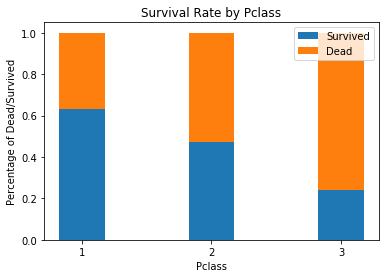

In [73]:
plt_surv = plt.bar(cla,surv,width = 0.35)
plt_ded = plt.bar(cla,ded,bottom=surv, width = 0.35)

plt.title('Survival Rate by Pclass')
plt.ylabel('Percentage of Dead/Survived')
plt.xlabel('Pclass')
plt.xticks(cla, ('1', '2', '3'))
plt.legend((plt_surv, plt_ded), ('Survived', 'Dead'))

# Age Survival

In [74]:
data["Age"].fillna(data["Age"].mean(),inplace=True)



In [75]:
aguhs = data["Age"].value_counts(bins=4)

bin_1 = data["Survived"][(data.Age>=1) & (data.Age<=20)].value_counts(normalize=True)
bin_2 = data["Survived"][(data.Age>20) & (data.Age<=40)].value_counts(normalize=True)
bin_3 = data["Survived"][(data.Age>40) & (data.Age<=60)].value_counts(normalize=True)
bin_4 = data["Survived"][data.Age>60].value_counts(normalize=True)



aguh_classes = [bin_1,bin_2,bin_3,bin_4]
age_cla = [1,2,3,4]

In [76]:
bin_1

0    0.563953
1    0.436047
Name: Survived, dtype: float64

In [77]:
aguhs

(20.315, 40.21]    562
(0.339, 20.315]    179
(40.21, 60.105]    128
(60.105, 80.0]      22
Name: Age, dtype: int64

In [78]:
print(bin_1,"\n",bin_2,"\n",bin_3,"\n",bin_4)

0    0.563953
1    0.436047
Name: Survived, dtype: float64 
 0    0.635231
1    0.364769
Name: Survived, dtype: float64 
 0    0.609375
1    0.390625
Name: Survived, dtype: float64 
 0    0.772727
1    0.227273
Name: Survived, dtype: float64


In [79]:
age_surv = [i[1] for i in aguh_classes]
age_ded = [i[0] for i in aguh_classes]

<function matplotlib.pyplot.gcf()>

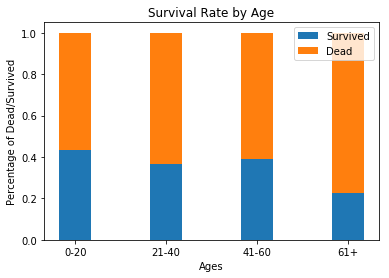

In [80]:
age_surv_plt = plt.bar(age_cla,age_surv,width = 0.35)
age_ded_plt = plt.bar(age_cla,age_ded,bottom=age_surv, width = 0.35)

plt.title('Survival Rate by Age')
plt.ylabel('Percentage of Dead/Survived')
plt.xlabel('Ages')
plt.xticks(age_cla, ('0-20', '21-40', '41-60','61+'))
plt.legend((age_surv_plt, age_ded_plt), ('Survived', 'Dead'))
plt.gcf


# Fare survival

(array([184.,  31.,  14.,   4.,   0.,   4.,   3.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   2.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ,
        24.1, 26.2, 28.3, 30.4, 32.5, 34.6, 36.7, 38.8, 40.9, 43. ]),
 <a list of 20 Patch objects>)

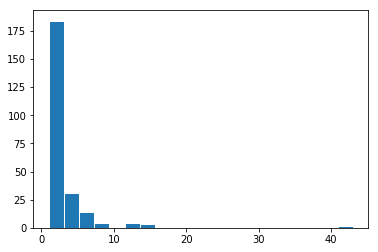

In [81]:
fare_counts = data["Fare"].value_counts(sort=True)
plt.hist(fare_counts, bins=20,edgecolor="white")

In [82]:
cnts_fare = data["Fare"].value_counts(bins=20, sort=False)
cnts_fare 

(-0.513, 25.616]      562
(25.616, 51.233]      170
(51.233, 76.849]       67
(76.849, 102.466]      39
(102.466, 128.082]     15
(128.082, 153.699]     16
(153.699, 179.315]      2
(179.315, 204.932]      0
(204.932, 230.548]      9
(230.548, 256.165]      2
(256.165, 281.781]      6
(281.781, 307.398]      0
(307.398, 333.014]      0
(333.014, 358.63]       0
(358.63, 384.247]       0
(384.247, 409.863]      0
(409.863, 435.48]       0
(435.48, 461.096]       0
(461.096, 486.713]      0
(486.713, 512.329]      3
Name: Fare, dtype: int64

In [83]:
fare_1 = data["Survived"][(data.Fare>=0.1) & (data.Fare<=25.50)].value_counts(normalize=True)
fare_2 = data["Survived"][(data.Fare>25.50) & (data.Fare<=51.50)].value_counts(normalize=True)
fare_3 = data["Survived"][(data.Fare>51.50) & (data.Fare<=75.50)].value_counts(normalize=True)
fare_4 = data["Survived"][(data.Fare>75.50) & (data.Fare<=100.50)].value_counts(normalize=True)
fare_5 = data["Survived"][(data.Fare>100.50) & (data.Fare<=125.50)].value_counts(normalize=True)
fare_6 = data["Survived"][(data.Fare>125.50) & (data.Fare<=150.50)].value_counts(normalize=True)
fare_7 = data["Survived"][data.Fare>150.50].value_counts(normalize=True)

In [84]:
fare_classes = [fare_1,fare_2,fare_3,fare_4,fare_5,fare_6,fare_7]
fare_cla = list(range(1,len(fare_classes)+1))

In [85]:
fare_surv = [i[1] for i in fare_classes]
fare_ded = [i[0] for i in fare_classes]

<function matplotlib.pyplot.gcf()>

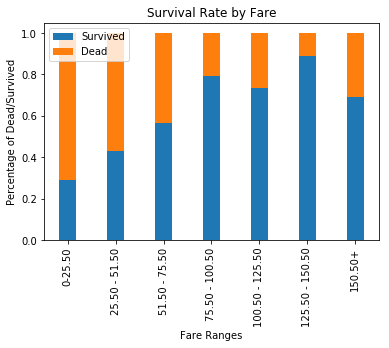

In [86]:
fare_surv_plt = plt.bar(fare_cla,fare_surv,width = 0.35)
fare_ded_plt = plt.bar(fare_cla,fare_ded,bottom=fare_surv, width = 0.35)

plt.title('Survival Rate by Fare')
plt.ylabel('Percentage of Dead/Survived')
plt.xlabel('Fare Ranges')
plt.xticks(fare_cla, ('0-25.50', '25.50 - 51.50', '51.50 - 75.50','75.50 - 100.50','100.50 - 125.50','125.50 - 150.50','150.50+'),rotation='vertical')
plt.legend((fare_surv_plt, fare_ded_plt), ('Survived', 'Dead'))
plt.gcf

# SibSP Survival 

In [87]:
sib_spouse = data["SibSp"].value_counts()
sib_spouse


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [88]:

ss_1 = data["Survived"][data.SibSp==0].value_counts(normalize=True)
ss_2 = data["Survived"][data.SibSp==1].value_counts(normalize=True)
ss_3 = data["Survived"][data.SibSp==2].value_counts(normalize=True)
ss_4 = data["Survived"][data.SibSp==3].value_counts(normalize=True)
ss_5 = data["Survived"][data.SibSp==4].value_counts(normalize=True)
ss_6 = data["Survived"][data.SibSp==5].value_counts(normalize=True)
ss_7 = data["Survived"][data.SibSp==8].value_counts(normalize=True)


ss_classes = [ss_1,ss_2,ss_3,ss_4,ss_5]#,ss_6,ss_7]
ss_special=[ss_6,ss_7]
ss_cla =[1,2,3,4,5]#,6,7]

In [89]:
print(ss_6,ss_7)

0    1.0
Name: Survived, dtype: float64 0    1.0
Name: Survived, dtype: float64


In [90]:
ss_surv = [i[1] for i in ss_classes]
ss_ded = [i[0] for i in ss_classes]

<function matplotlib.pyplot.gcf()>

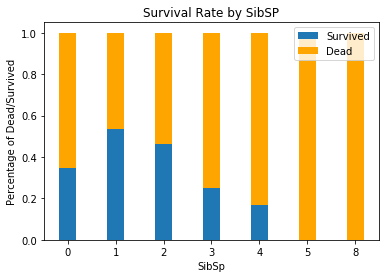

In [91]:
ss_surv_plt = plt.bar(ss_cla,ss_surv,width = 0.35)
ss_ded_plt = plt.bar(ss_cla,ss_ded,bottom=ss_surv, width = 0.35, color="orange")
sp1_ss_plt =  plt.bar(6,1,width = 0.35,color="orange")
sp2_ss_plt =  plt.bar(7,1,width = 0.35, color="orange")

ss_xranges = range(1,8)

plt.title('Survival Rate by SibSP')
plt.ylabel('Percentage of Dead/Survived')
plt.xlabel('SibSp')
plt.xticks(ss_xranges, ('0', '1', '2','3','4','5','8'))
plt.legend((ss_surv_plt, ss_ded_plt), ('Survived', 'Dead'))
plt.gcf

In [92]:
data.drop(columns=["PassengerId","Survived"],inplace=True)

In [93]:
data.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [94]:
test = data.drop(columns=["Name","Cabin","Embarked","Ticket"])

In [95]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [96]:
pclass_1 = test["Age"][data["Pclass"]==1]
pclass_2 = test["Age"][data["Pclass"]==2]
pclass_3 = test["Age"][data["Pclass"]==3]

print(pclass_1.shape,pclass_2.shape,pclass_3.shape)

(216,) (184,) (491,)


(array([ 3.,  6., 30., 59., 42., 27., 27., 16.,  5.,  1.]),
 array([ 0.92 ,  8.828, 16.736, 24.644, 32.552, 40.46 , 48.368, 56.276,
        64.184, 72.092, 80.   ]),
 <a list of 10 Patch objects>)

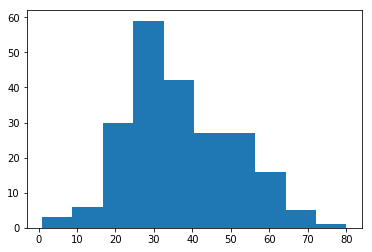

In [97]:
plt.hist(pclass_1)

(array([15.,  4., 20., 43., 52., 22.,  9., 12.,  5.,  2.]),
 array([ 0.67 ,  7.603, 14.536, 21.469, 28.402, 35.335, 42.268, 49.201,
        56.134, 63.067, 70.   ]),
 <a list of 10 Patch objects>)

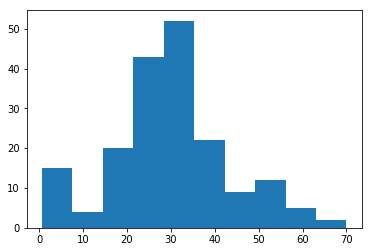

In [98]:
plt.hist(pclass_2)

(array([ 32.,  26., 103., 216.,  59.,  32.,  16.,   2.,   3.,   2.]),
 array([ 0.42 ,  7.778, 15.136, 22.494, 29.852, 37.21 , 44.568, 51.926,
        59.284, 66.642, 74.   ]),
 <a list of 10 Patch objects>)

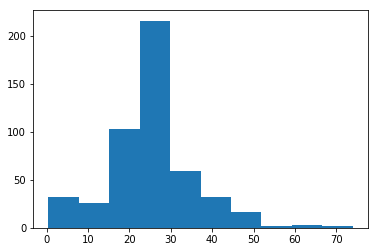

In [99]:
plt.hist(pclass_3)

In [100]:
print(pclass_1.isna().sum(),pclass_2.isna().sum(),pclass_3.isna().sum())

0 0 0


In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [102]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
x=data.drop(columns=["Name","Ticket","Cabin","Embarked"])
x = pd.get_dummies(x,columns=["Sex","Pclass"])
x["Age"].fillna(x["Age"].mean(),inplace=True)
x= np.array(x)

In [104]:
gnb=GaussianNB()

errs=[]
nsplits = 1000
for split in range(nsplits):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(x,y,test_size=.25)
    gnb.fit(XTRAIN,YTRAIN)
    YP=gnb.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("%d Splits: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(nsplits, np.mean(errs),1.96*np.std(errs)))
print(confusion_matrix(YTEST,YP))

1000 Splits: Mean Error=0.211677 +/- 0.047280 (95%)
[[124  24]
 [ 22  53]]


In [105]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.000000,1,0,7.2500
1,1,female,38.000000,1,0,71.2833
2,3,female,26.000000,0,0,7.9250
3,1,female,35.000000,1,0,53.1000
4,3,male,35.000000,0,0,8.0500
5,3,male,29.699118,0,0,8.4583
6,1,male,54.000000,0,0,51.8625
7,3,male,2.000000,3,1,21.0750
8,3,female,27.000000,0,2,11.1333
9,2,female,14.000000,1,0,30.0708


In [106]:
test["Age"][data["Pclass"]==1].fillna(test["Age"][data["Pclass"]==1].mean(),inplace=True)
test["Age"][data["Pclass"]==2].fillna(test["Age"][data["Pclass"]==2].mean(),inplace=True)
test["Age"][data["Pclass"]==3].fillna(test["Age"][data["Pclass"]==3].mean(),inplace=True)

In [107]:
test["Age"].fillna(test["Age"][data["Pclass"]==1].median(),inplace=True)

In [108]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.000000,1,0,7.2500
1,1,female,38.000000,1,0,71.2833
2,3,female,26.000000,0,0,7.9250
3,1,female,35.000000,1,0,53.1000
4,3,male,35.000000,0,0,8.0500
5,3,male,29.699118,0,0,8.4583
6,1,male,54.000000,0,0,51.8625
7,3,male,2.000000,3,1,21.0750
8,3,female,27.000000,0,2,11.1333
9,2,female,14.000000,1,0,30.0708


In [109]:
test= pd.get_dummies(test,columns=["Sex","Pclass"])
testx = np.array(test)

In [110]:
#slightly diff fill na's

test_errs=[]
nsplits = 1000
for split in range(nsplits):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(testx,y,test_size=.25)
    gnb.fit(XTRAIN,YTRAIN)
    YP=gnb.predict(XTEST)
    test_errs.append(1-accuracy_score(YTEST,YP))
print("%d Splits: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(nsplits, np.mean(test_errs),1.96*np.std(test_errs)))
print(confusion_matrix(YTEST,YP))

1000 Splits: Mean Error=0.212318 +/- 0.047495 (95%)
[[120  18]
 [ 23  62]]


In [111]:
#look at embarked and fares/pclass/ages etcs?